<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_09_Desicion_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Algoritmo CART (classification and regresion tree)

Se busca entrenar un modelo para categorizar la información encontrando la frontera de desición, permite tener una mejor interpretabilidad que las redes neuronales dado que se puede tener una represetancion grafica del proceso de desiscion secuencial.

- ref https://www.youtube.com/watch?v=kqaLlte6P6o&ab_channel=CodificandoBits
- Hand on Machine leargning 




Dado un conjunto de caracteristicas se establece una condición que realiza 
una particion binaria de los datos a clasificar repitiendo hasta encontrar 
particiones lo más homogenea posible.




Text(0, 0.5, '$X_2$')

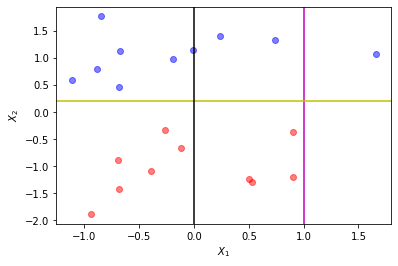

In [ ]:
X0, y0 = make_classification(n_samples=20,
    n_features=2, n_redundant=0, n_informative=1, random_state=1, 
    n_clusters_per_class=1)

x=np.arange(-2, 3,1)
x_,y_ = np.meshgrid(x,x)

fig, ax = plt.subplots()
ax.plot(X0[:,0][y0==0],X0[:,1][y0==0],"ro", alpha=0.5)
ax.plot(X0[:,0][y0==1],X0[:,1][y0==1],"bo", alpha=0.5)
#ax.plot(x_,y_,"k.")

ax.axvline(x = 1, color = 'm', label="x1<=1")
ax.axhline(y = 0.2, color = 'y', label="x2<0.2")
ax.axvline(x = 0.0, color = 'k', label="x2<0.2")
#plt.legend(loc=3)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")


- Gini index


$G = 1 - (PC_1)^2 - (PC_2)^2$

$PC_1$: Probablidad categoria 1 

$PC_2$: Probablidad categoria 2 

Si :

- $G=0$ nodos puros, datos que pertenecen a una sola categoría

- Gini > 0 son nodos con impurezas, con mas de una categoría


La partición purpura  y amarilla del gráfico anterior representan nodos puros.

Mientras que la linea negra define:

- 7 puntos son de color azul.

- 6 puntos de color rojo.

$G = 1 - (7/13)^{2} - (6/13)^{2}$

mientrás que la ponderacion viene dada por:

$m = (7/20+7/20)=7/10$



No:

$G=1-(3/7)^{2}-(4/7)^{2}$
m = (3/20+4/20)


La funcion de coste, asocida al nodo padre:

$J(k, t_k) = \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right} $



# Algoritmo
1. Calcular todos los posibles condiciones. 
2. Calcular los indices de Gini.
3. Encontrar la funcion de coste 
4. Escoger la menor funcion de coste 
5. Repetir.


# Laboratorio

1. Importar iris dataset 
2. Generar una intuición respecto a iris dataset. Ver laboratorio anterior.
3. Dividir el *dataset* empleanto el metodo train_test_split de sklearn
4. Dentro de sklearn, aplicar el algoritmo DecisionTreeClassifier.
5. Para el clasificador analice el gráfico de desición:

```python

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

  fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
  graph=tree.plot_tree(clf,class_names = iris.target_names,\
                feature_names = iris.feature_names,\
                impurity=False, filled=True,rounded=True )

```

6. Características importantes.

```python
clf.feature_importances_
caract = iris.data.shape[1]
plt.barh(range(caract), clf.feature_importances_)
plt.yticks(np.arange(caract),iris.feature_names)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.show()
```

7. Fronteras de desición.



```python
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)
  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()
```


In [1]:
#Run this if you want to force to use CPU
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
print("Características:", iris.feature_names)
print("Clases:", iris.target_names)
print("Forma del dataset:", X.shape)

Características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Clases: ['setosa' 'versicolor' 'virginica']
Forma del dataset: (150, 4)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)

In [6]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

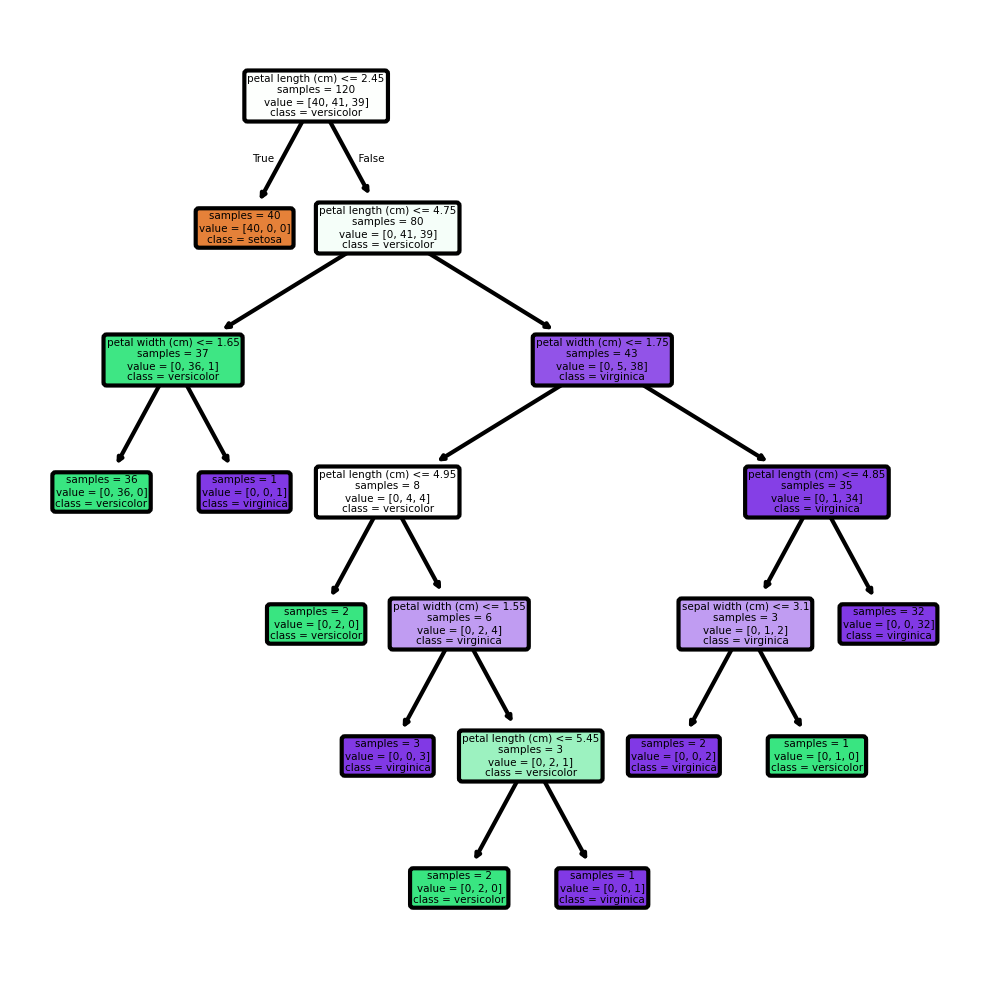

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)


tree.plot_tree(
clf,
class_names=iris.target_names,
feature_names=iris.feature_names,
impurity=False,
filled=True,
rounded=True
)


plt.show()

Importancia de las características:
[0.         0.01667014 0.90614339 0.07718647]


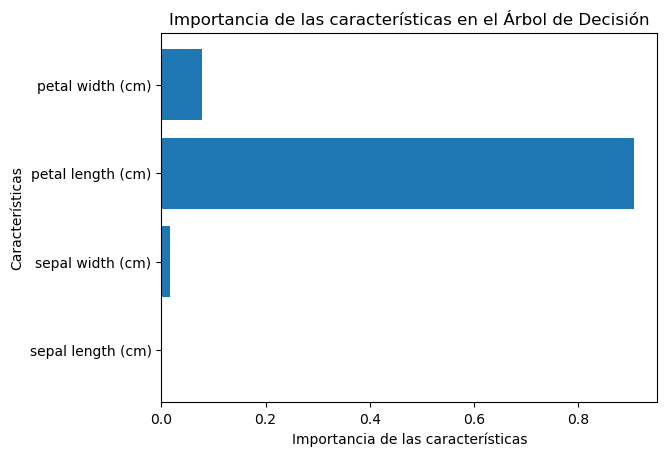

In [8]:
print("Importancia de las características:")
print(clf.feature_importances_)


caract = iris.data.shape[1]
plt.barh(range(caract), clf.feature_importances_)
plt.yticks(np.arange(caract), iris.feature_names)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.title('Importancia de las características en el Árbol de Decisión')
plt.show()

/tmp/ipykernel_11099/3959247898.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_11099/3959247898.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_11099/3959247898.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_11099/3959247898.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_11099/3959247898.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_

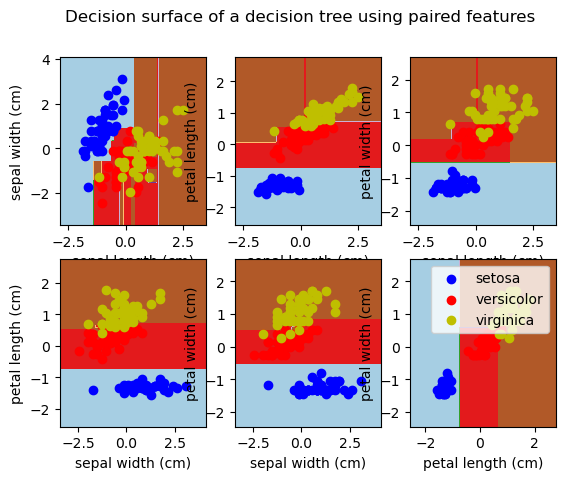

In [12]:
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)
  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

En este laboratorio se entrenó un Árbol de Decisión sobre el dataset Iris, se analizó su estructura, la importancia de las características y las fronteras de decisión para diferentes combinaciones de atributos. Esto permite comprender cómo el modelo separa las clases y qué variables influyen más en la clasificación